# **Put-to-Light (PTL) System & Constructive Algorithm Design**



---

## **📚 Student Data**
- **Name**: Jesús Ricardo Gandica Velasco  
- **Student ID**: 1000259918
- **Python Ver.**: 3.11.5
- **Course**: Heurística – 2025-1  
- **Professor**: Juan G. Villegas  
- **Date**: 20/02/2025  

---

## **📦 PTL System Overview**
A **put-to-light system** assigns orders (batches) to zones/positions for classification. Key components:  
- **Orders**: Composed of SKUs; cannot split orders.  
- **Zones/Positions**: Workers travel between positions at speed `v`.  
- **Objective**: Balance workloads (time = SKU processing + travel) across zones.  



# **📚 Importing Libraries**



## **Key Libraries for the PTL Problem**
To implement and solve the PTL problem, the following Python libraries are essential:

1. **`pandas`**:  
   - For reading and manipulating instance data.     

2. **`numpy`**:  
   - For numerical computations.     

3. **`matplotlib`**:  
   - For visualizing results.  
   - Example:       

4. **`graphviz` or ``**:  
   - For generating the flow charts.     

5. **`time`**:  
   - For measuring algorithm performance.   

In [1]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
import time


# **📥 Reading Instance Data**

## **Data Components**  

Instance data for the PTL problem includes:  
- **Orders**: SKU composition (`rp_im`), processing times (`tr_im`).  
- **Zones**: Positions per zone (`s_jk`), distances (`d_jk`).  
- **Workers**: Speed (`v`), zone assignments.  

## Datasets

In [2]:
#ruta = "C:/Users/usuario/Desktop/Proyecto PTL/Data_PTL/Data_40_Salidas_composición_zonas_homogéneas.xlsx"
ruta = "C:/Users/usuario/Desktop/Proyecto PTL/Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx"

excel_modelo = pd.ExcelFile(ruta)

#Lectura de conjuntos
Conjunto_pedidos = pd.read_excel(excel_modelo, 'Pedidos', index_col=0) #Pedidos
Conjunto_zonas = pd.read_excel(excel_modelo, 'Zonas', index_col=0) #Zonas
Conjunto_salidas = pd.read_excel(excel_modelo, 'Salidas', index_col=0) #Salidas
Conjunto_skus = pd.read_excel(excel_modelo, 'SKU', index_col=0) #SKUs
#Conjunto_trabajadores = pd.read_excel(excel_modelo, 'Trabajadores', index_col=0) #Trabajadores

#Lectura de parametros de salidas
N_Salidas = pd.read_excel(excel_modelo, 'Salidas_en_cada_zona', index_col=0) #Cantidad de salidas por cada zona
Salidas_por_zona = pd.read_excel(excel_modelo, 'Salidas_pertenece_zona', index_col=0) #Parametro binario, salidas que están incluidas en cada zona
Tiempo_salidas = pd.read_excel(excel_modelo, 'Tiempo_salida', index_col=0) #Tiempo para desplazarse desde el lector al punto medio de cada salida

#Lectura de parametros de SKUs
SKUS_por_pedido = pd.read_excel(excel_modelo, 'SKU_pertenece_pedido', index_col=0) #Parámetro binario, SKUS que están incluidas en un pedido
Tiempo_SKU = pd.read_excel(excel_modelo, 'Tiempo_SKU', index_col=0) #Tiempo total de lectura, conteo, separación, depósito de cada ref por pedidotr

#Lectura de parametros adicionales
Parametros = pd.read_excel(excel_modelo, 'Parametros', index_col=0) #Parametros

### **Sets**

>Set_orders:  $\mathcal{P}$

>Set_zones:  $\mathcal{Z}$

>Set_positions: $\mathcal{S}$

>Set_SKUS: $\mathcal{R}$


In [3]:
pedidos = list(Conjunto_pedidos.index)
zonas = list(Conjunto_zonas.index)
salidas = list(Conjunto_salidas.index)
skus = list(Conjunto_skus.index)

print("Los conjuntos son: \n")
print("Pedidos: ", pedidos)
print("Zonas: ", zonas)
print("Salidas: ", salidas)
print("SKUs: ", skus)


Los conjuntos son: 

Pedidos:  ['Pedido_1', 'Pedido_2', 'Pedido_3', 'Pedido_4', 'Pedido_5', 'Pedido_6', 'Pedido_7', 'Pedido_8', 'Pedido_9', 'Pedido_10', 'Pedido_11', 'Pedido_12', 'Pedido_13', 'Pedido_14', 'Pedido_15', 'Pedido_16', 'Pedido_17', 'Pedido_18', 'Pedido_19', 'Pedido_20', 'Pedido_21', 'Pedido_22', 'Pedido_23', 'Pedido_24', 'Pedido_25', 'Pedido_26', 'Pedido_27', 'Pedido_28', 'Pedido_29', 'Pedido_30', 'Pedido_31', 'Pedido_32', 'Pedido_33', 'Pedido_34', 'Pedido_35', 'Pedido_36', 'Pedido_37', 'Pedido_38', 'Pedido_39', 'Pedido_40']
Zonas:  ['Z1', 'Z2']
Salidas:  ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032', 'S033', 'S034', 'S035', 'S036', 'S037', 'S038', 'S039', 'S040']
SKUs:  ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6', 'SKU_7', 'SKU_8', 'SKU_9', 'SKU_10', 'SKU_1

### **Parameters**  

>$v$: speed of movement of the operators  

>$zn$: number of zones in the PTL system  

In [4]:
V = Parametros['v']
ZN = Parametros ['zn']

v=float(V)
zn=float(ZN)

print("Los parametros son: \n")
print("Velocidad de movimiento (v) = ", v)
print("Número de zonas (zn) = ", zn)

Los parametros son: 

Velocidad de movimiento (v) =  61.66
Número de zonas (zn) =  2.0


C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\3582578321.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  v=float(V)
C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\3582578321.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zn=float(ZN)


### **Assignment of Outputs to Zones**  

>$s_{jk}$: Binary parameter, where $s_{jk} = 1$ if output $k \in S$ is in zone $j \in Z$, and $s_{jk} = 0$ otherwise.  

In [5]:
#Salidas que están incluidas en cada zona
s={(j,k):Salidas_por_zona.at[j,k] for k in salidas for j in zonas}

In [6]:
print("Salidas que están incluidas en cada zona: \n")

#Mostrar en forma de dataframe
df_s = pd.DataFrame(data=s.values(), index=pd.MultiIndex.from_tuples(s.keys())).unstack(fill_value=0)

df_s

Salidas que están incluidas en cada zona: 



0                                               ...                      \
   S001 S002 S003 S004 S005 S006 S007 S008 S009 S010  ... S031 S032 S033 S034   
Z1    1    1    1    1    1    1    1    1    1    1  ...    0    0    0    0   
Z2    0    0    0    0    0    0    0    0    0    0  ...    1    1    1    1   

                                  
   S035 S036 S037 S038 S039 S040  
Z1    0    0    0    0    0    0  
Z2    1    1    1    1    1    1  

[2 rows x 40 columns]

### **Assignment of an SKU to an Order**  

>$rp_{im}$: Binary parameter, where $rp_{im} = 1$ if SKU $m \in R$ is required in order $i \in P$, and $rp_{im} = 0$ otherwise.  


In [7]:
rp = {(i, m): SKUS_por_pedido.at[i, m] for m in skus for i in pedidos}

print("SKUs que están incluidas en un pedido: \n")

for i in pedidos:
    print("Para el pedido ", i, " los SKUs son: ")
    skus_pedido = []
    for m in skus:
        if rp[i,m] == 1:
            #dejar solo el numero del sku
            m = m[4:]
            
            skus_pedido.append(m)
    #mostrar en forma de texto
    texto_skus = ', '.join(skus_pedido)
    print(texto_skus)

SKUs que están incluidas en un pedido: 

Para el pedido  Pedido_1  los SKUs son: 
1, 25, 52, 121, 122, 123, 124, 125, 132, 135, 136, 153, 182, 209, 219, 241, 290, 291, 293, 294, 297, 298, 299, 300, 315, 316, 320, 321, 324, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 345, 346, 347, 348, 349, 350, 351, 352, 353, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409
Para el pedido  Pedido_2  los SKUs son: 
4, 47, 49, 52, 53, 54, 57, 121, 122, 123, 124, 125, 129, 154, 185, 199, 211, 219, 241, 247, 290, 291, 293, 297, 298, 299, 300, 315, 316, 320, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 

In [8]:
#Ver todos los sku del pedido i

i = rp.keys()
i = list(i)

pedido1 = i[4][0]

print("Pedido ", pedido1)
cant = 0
for m in skus:
    if rp[pedido1,m]==1:
        cant += 1
        
print("Cantidad de SKU: ", cant)

Pedido  Pedido_5
Cantidad de SKU:  127


In [9]:
# Lista de pedidos con mas SKU's
pedido_cantidades = {}
for i in pedidos:
    cant = 0
    for m in skus:
        if rp[i,m]==1:
            cant += 1
    #Añadir al diccionario
    pedido_cantidades[i] = cant

#Ordenar de mayor a menor
dict(sorted(pedido_cantidades.items(), key=lambda item: item[1], reverse=True))

{'Pedido_16': 144,
 'Pedido_28': 135,
 'Pedido_35': 131,
 'Pedido_5': 127,
 'Pedido_7': 126,
 'Pedido_15': 122,
 'Pedido_22': 121,
 'Pedido_33': 117,
 'Pedido_6': 116,
 'Pedido_38': 115,
 'Pedido_2': 114,
 'Pedido_3': 111,
 'Pedido_17': 111,
 'Pedido_14': 110,
 'Pedido_25': 110,
 'Pedido_40': 110,
 'Pedido_18': 109,
 'Pedido_37': 108,
 'Pedido_4': 107,
 'Pedido_13': 107,
 'Pedido_19': 107,
 'Pedido_9': 106,
 'Pedido_23': 104,
 'Pedido_11': 103,
 'Pedido_12': 102,
 'Pedido_39': 102,
 'Pedido_10': 101,
 'Pedido_27': 101,
 'Pedido_36': 99,
 'Pedido_1': 96,
 'Pedido_26': 96,
 'Pedido_32': 96,
 'Pedido_20': 94,
 'Pedido_30': 93,
 'Pedido_24': 92,
 'Pedido_31': 89,
 'Pedido_21': 85,
 'Pedido_29': 46,
 'Pedido_34': 44,
 'Pedido_8': 43}

### **Distance to Each Output**  

>$d_{jk}$: Distance in meters from the scanner point to output $k \in S$ in zone $j \in Z$. If the output is not in the zone, then $d_{jk} = 0$.  

In [10]:
# Time to Pick an SKU at an Output  

d = {(j, k): Tiempo_salidas.at[j, k] for k in salidas for j in zonas}  

print("Tiempo para desplazarse desde el lector al punto medio de cada salida: \n")
#mostrar en forma de dataframe
df_d = pd.DataFrame(data=d.values(), index=pd.MultiIndex.from_tuples(d.keys())).unstack(fill_value=0)
df_d

Tiempo para desplazarse desde el lector al punto medio de cada salida: 



0                                                                 ...  \
     S001   S002   S003   S004   S005   S006   S007   S008   S009   S010  ...   
Z1  0.305  0.915  1.525  2.135  0.305  0.915  1.525  2.135  2.745  3.355  ...   
Z2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  ...   

                                                                          
     S031   S032   S033   S034   S035   S036   S037   S038   S039   S040  
Z1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
Z2  1.525  2.135  2.745  3.355  3.965  4.575  2.745  3.355  3.965  4.575  

[2 rows x 40 columns]

### **New Parameters**  

>$tr_{im}$: Time required to pick all units of a given SKU ($m \in R$) in a specific order ($i \in P$).  




In [11]:
tra = {(i, m): Tiempo_SKU.at[i, m] for m in skus for i in pedidos}  
tra

print("Tiempo total de lectura, conteo, separación, depósito de cada ref por pedido: \n")
#mostrar en forma de dataframe
tra_sin_ceros = {k: v for k, v in tra.items() if v != 0}
tra_sin_ceros

Tiempo total de lectura, conteo, separación, depósito de cada ref por pedido: 



{('Pedido_1', 'SKU_1'): 0.08333333333333333,
 ('Pedido_11', 'SKU_1'): 0.08333333333333333,
 ('Pedido_12', 'SKU_1'): 0.08333333333333333,
 ('Pedido_15', 'SKU_2'): 0.08333333333333333,
 ('Pedido_19', 'SKU_2'): 0.08333333333333333,
 ('Pedido_23', 'SKU_2'): 0.08333333333333333,
 ('Pedido_27', 'SKU_2'): 0.08333333333333333,
 ('Pedido_9', 'SKU_3'): 0.08333333333333333,
 ('Pedido_2', 'SKU_4'): 0.8333333333333333,
 ('Pedido_8', 'SKU_4'): 0.8333333333333333,
 ('Pedido_18', 'SKU_4'): 0.8333333333333333,
 ('Pedido_33', 'SKU_4'): 0.8333333333333333,
 ('Pedido_33', 'SKU_5'): 0.08333333333333333,
 ('Pedido_35', 'SKU_5'): 0.08333333333333333,
 ('Pedido_9', 'SKU_6'): 0.08333333333333333,
 ('Pedido_15', 'SKU_6'): 0.08333333333333333,
 ('Pedido_33', 'SKU_6'): 0.08333333333333333,
 ('Pedido_14', 'SKU_7'): 0.08333333333333333,
 ('Pedido_26', 'SKU_7'): 0.08333333333333333,
 ('Pedido_15', 'SKU_8'): 0.16666666666666666,
 ('Pedido_15', 'SKU_9'): 0.16666666666666666,
 ('Pedido_16', 'SKU_9'): 0.0833333333333333

### **Number of Outputs in Each Zone**  

>$ns_{j}$: Number of outputs in zone $j \in Z$  

In [12]:
n_sal = N_Salidas.Num_Salidas
n_sal

print("Cantidad de salidas por cada zona: \n")
n_sal

Cantidad de salidas por cada zona: 



Zonas
Z1    24
Z2    16
Name: Num_Salidas, dtype: int64

---
# **Methods**
For all given methods we need to have some basic work elements, in this case a baseline order and the type of objective

## **Step 1: Precompute Base Time and distances for Each Order**

Calculate base time (without distance) and minimal distances per zone

In [13]:
order_info = {}
for i in pedidos:
    # Tiempo base de procesamiento
    tiempo_procesamiento = sum(tra[(i, m)] for m in skus if rp[(i, m)] == 1)
    
    # Distancias mínimas por zona (solo zonas donde el pedido puede asignarse)
    distancias_zona = {}
    for j in zonas:
        # Posiciones disponibles en la zona j (s_jk=1)
        posiciones_zona = [k for k in salidas if s[(j, k)] == 1]
        if posiciones_zona:
            distancia_min = min(d[(j, k)] for k in posiciones_zona)
            distancias_zona[j] = distancia_min
            
    order_info[i] = {
        'tiempo': tiempo_procesamiento,
        'distancias': distancias_zona
    }
    
order_info

{'Pedido_1': {'tiempo': 14.499999999999995,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_2': {'tiempo': 26.000000000000007,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_3': {'tiempo': 20.166666666666668,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_4': {'tiempo': 20.5, 'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_5': {'tiempo': 25.83333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_6': {'tiempo': 23.583333333333332,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_7': {'tiempo': 26.166666666666675,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_8': {'tiempo': 5.083333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_9': {'tiempo': 18.58333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_10': {'tiempo': 17.66666666666667,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_11': {'tiempo': 18.41666666666667,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_12': {'tiempo': 17.083333333333

## **Step 2: Select the objective function for the algorithm**

- **min_avg**: Minimizes the average classification time across zones.
- **min_diff**: Minimizes the difference between the maximum and minimum classification times.
- **min_max**: Minimizes the maximum classification time among all zones.


In [14]:
OBJECTIVE = 'min_diff'  # Opciones: 'min_avg', 'min_diff', 'min_max'
#OBJECTIVE = 'min_avg'  
#OBJECTIVE = 'min_diff'  

---

## **Greedy Algorrithm construction**

- **Initialization:** Set up dictionaries for workloads (initially zero for each zone), available positions (each zone’s positions sorted by increasing distance), and an empty assignments record.
- **Order Sorting:** If the objective is 'min_max', sort orders in descending order by their classification time; otherwise, maintain the original order.
- **Candidate Generation:** For each order, generate candidate assignments by:
  - Checking each zone for available positions and ensuring the zone has a defined distance for the order.
  - Selecting the closest available position in the zone.
  - Calculating the order’s classification time (order time + 2 × travel time).
- **Candidate Selection:** Based on the objective:
  - For **min_avg**, pick the candidate with the smallest classification time.
  - For **min_diff**, simulate the assignment in each zone and select the candidate that minimizes the potential workload difference.
  - For **min_max**, choose the candidate that minimizes the potential new maximum workload.
- **Assignment Update:** Update the selected zone’s workload by adding the order’s classification time, remove the used position from available positions, and record the assignment.
- **Return Results:** After processing all orders, return the assignments and the updated workloads.



In [15]:
def greedy_construction(objective, pedidos, zonas, salidas, s, d, order_info, v, rp):
    start = time.perf_counter() # Iniciar temporizador
    # Inicializar estructuras
    workloads = {j: 0 for j in zonas}
    available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                          key=lambda x: d[(j, x)]) for j in zonas}
    assignments = {}
    
    # Ordenar pedidos por criterio dependiendo del objetivo
    if objective == 'min_max':
        sorted_orders = sorted(pedidos, key=lambda x: order_info[x]['tiempo'], reverse=True)
    else:
        sorted_orders = pedidos  # Mantener orden original para otros objetivos
    
    for i in sorted_orders:
        candidates = []
        # Generar candidatos válidos (zonas con posiciones disponibles)
        for j in zonas:
            if available_positions[j] and j in order_info[i]['distancias']:
                k = available_positions[j][0]  # Posición más cercana
                distancia = d[(j, k)]
                Y_i = order_info[i]['tiempo'] + 2 * distancia / v
                candidates.append((j, k, Y_i))
        
        if not candidates:
            raise ValueError(f"Pedido {i} no puede ser asignado - sin posiciones disponibles")
        
        # Selección basada en el objetivo
        if objective == 'min_avg':
            # Minimizar suma total (equivalente a promedio)
            best = min(candidates, key=lambda x: x[2])
            
        elif objective == 'min_diff':
            # Minimizar diferencia potencial
            current_workloads = workloads.copy()
            best = None
            min_diff = float('inf')
            
            for j, k, Y in candidates:
                temp_workloads = current_workloads.copy()
                temp_workloads[j] += Y
                new_diff = float(max(temp_workloads.values())) - float(min(temp_workloads.values()))
                
                if new_diff < min_diff:
                    min_diff = new_diff
                    best = (j, k, Y)
                    
        elif objective == 'min_max':
            # Minimizar nuevo máximo potencial
            current_max = max(workloads.values())
            best = None
            min_new_max = float('inf')
            
            for j, k, Y in candidates:
                new_max = max(current_max, workloads[j] + Y)
                if new_max < min_new_max:
                    min_new_max = new_max
                    best = (j, k, Y)
        
        # Asignar el mejor candidato
        j_sel, k_sel, Y_sel = best
        workloads[j_sel] += Y_sel
        available_positions[j_sel].remove(k_sel)
        assignments[i] = (j_sel, k_sel, Y_sel)
    total_time = time.perf_counter() - start  # Calcular tiempo total
    return assignments, workloads, total_time

## **Layered Algorithm construction**

- **Initialization:**  
  Set initial workloads to 0 for each zone, sort available positions by distance for each zone, create an empty assignments dictionary, and mark all orders as unassigned.

- **Layering Orders by Complexity:**  
  Group orders into three layers ('high', 'medium', and 'low') based on their classification time and the number of available distances.

- **Processing Layers:**  
  Process orders in phases, starting with the 'high' layer, then 'medium', and finally 'low', ensuring only unassigned orders are handled in each phase.

- **Candidate Generation:**  
  For each order in the current phase, iterate over eligible zones to:
  - Select the closest available position.
  - Compute the classification time \(Y_i\) as the sum of the order's time and twice the travel time (i.e., \(Y_i = \text{order time} + 2 \times \text{distance} / v\)).
  - Simulate updating workloads for each candidate zone.

- **Metric Calculation & Candidate Selection:**  
  Calculate a metric for each candidate:
  - For **min_avg**, use the individual order's classification time.
  - For **min_diff**, use the resulting workload difference after the assignment.
  - For **min_max**, use the new maximum workload.
  
  Then, select the candidate with the minimum metric.

- **Assignment Update:**  
  Update the selected zone's workload, remove the chosen position from its available positions, record the assignment, and remove the order from the unassigned list.

- **Final Output:**  
  Return the final assignments along with the updated workloads.


In [16]:
def layered_assignment_construction(objective, pedidos, zonas, salidas, s, d, order_info, v, rp):
    start = time.perf_counter() # Iniciar temporizador
    # Inicialización
    workloads = {j: 0 for j in zonas}
    available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                           key=lambda x: d[(j, x)]) for j in zonas}
    assignments = {}
    unassigned = pedidos.copy()
    
    # Paso 1: Clasificar pedidos en capas por complejidad
    layers = {
        'high': sorted([i for i in unassigned], 
                      key=lambda x: (-order_info[x]['tiempo'], len(order_info[x]['distancias']))),
        'medium': sorted([i for i in unassigned], 
                       key=lambda x: (len(order_info[x]['distancias']), -order_info[x]['tiempo'])),
        'low': unassigned
    }
    
    # Paso 2: Procesar en fases (capas)
    for phase in ['high', 'medium', 'low']:
        phase_orders = layers[phase] if phase == 'high' else [i for i in layers[phase] if i in unassigned]
        
        for i in phase_orders:
            if i not in unassigned:
                continue
            
            candidates = []
            for j in order_info[i]['distancias']:
                if available_positions[j]:
                    k = available_positions[j][0]
                    Y_i = order_info[i]['tiempo'] + 2*d[(j, k)]/v
                    temp_workloads = workloads.copy()
                    temp_workloads[j] += Y_i
                    
                    # Calcular métrica según objetivo
                    if objective == 'min_avg':
                        metric = Y_i  # Minimizar contribución individual
                    elif objective == 'min_diff':
                        metric = max(temp_workloads.values()) - min(temp_workloads.values())
                    elif objective == 'min_max':
                        metric = max(temp_workloads.values())
                    
                    candidates.append((j, k, Y_i, metric))
            
            if not candidates:
                raise ValueError(f"Pedido {i} no puede ser asignado")
            
            # Selección según objetivo
            if objective == 'min_avg':
                best = min(candidates, key=lambda x: x[3])
            else:
                best = min(candidates, key=lambda x: x[3])
            
            # Asignar
            j_sel, k_sel, Y_sel, _ = best
            workloads[j_sel] += Y_sel
            available_positions[j_sel].remove(k_sel)
            assignments[i] = (j_sel, k_sel, Y_sel)
            unassigned.remove(i)
    total_time = time.perf_counter() - start  # Calcular tiempo total
    return assignments, workloads, total_time

## **GRASP (Greedy randomized adaptive search procedure)**

- **Initialization & Parameters:**  
  Set the best solution variables to None and best metric to infinity. Define GRASP parameters, notably the randomization factor (alpha = 0.3).

- **Iterative Construction (max_iter iterations):**  
  For each iteration, reinitialize the workloads (all zeros), available positions (sorted by distance for each zone), assignments (empty), and the unassigned orders list.

- **Randomized Order Sorting:**  
  Sort orders by descending classification time while introducing randomness (using a random tie-breaker) to diversify the solution space.

- **Candidate Generation for Each Order:**  
  For every order in the sorted list, iterate through eligible zones to:
  - Check if a zone has available positions.
  - Pick the closest available position.
  - Calculate the classification time \(Y_i\) as the sum of the order's base time and twice the travel time.
  - Simulate the new workload for the zone and compute a metric based on the objective:
    - **min_avg:** Average workload across zones.
    - **min_diff:** Difference between the maximum and minimum workloads.
    - **min_max:** Maximum workload among zones.

- **Restricted Candidate List (RCL) Creation & Selection:**  
  Identify the best and worst candidate metrics, set a threshold using alpha, and form the RCL with candidates whose metric is below the threshold. Then, randomly select one candidate from the RCL (or choose the best if the RCL is empty).

- **Assignment & Update:**  
  Update the selected zone's workload with the chosen candidate’s \(Y_i\), remove the used position from its list, and record the assignment. 

- **Solution Evaluation & Update:**  
  After assigning all orders, compute the overall metric of the solution. If this solution outperforms the current best, update the best solution and its corresponding workloads.

- **Return Best Solution:**  
  Finally, return the best assignments and workloads achieved over all iterations.


In [17]:
def randomized_grasp_construction(objective, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp):
    start = time.perf_counter() # Iniciar temporizador
    best_assignments = None
    best_workloads = None
    best_metric = float('inf')
    
    # Parámetros GRASP
    alpha = 0.3  # Factor de aleatorización [0-1]
    
    for _ in range(max_iter):
        # Reinicializar estructuras
        workloads = {j: 0 for j in zonas}
        available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                              key=lambda x: d[(j, x)]) for j in zonas}
        assignments = {}
        unassigned = pedidos.copy()
        
        # Orden aleatorio con prioridad
        sorted_orders = sorted(pedidos, 
                              key=lambda x: (-order_info[x]['tiempo'], np.random.random()))
        
        for i in sorted_orders:
            candidates = []
            for j in order_info[i]['distancias']:
                if available_positions[j]:
                    k = available_positions[j][0]
                    Y_i = order_info[i]['tiempo'] + 2*d[(j, k)]/v
                    temp_workloads = workloads.copy()
                    temp_workloads[j] += Y_i
                    
                    # Calcular métrica según objetivo
                    if objective == 'min_avg':
                        metric = sum(temp_workloads.values())/len(zonas)
                    elif objective == 'min_diff':
                        metric = max(temp_workloads.values()) - min(temp_workloads.values())
                    elif objective == 'min_max':
                        metric = max(temp_workloads.values())
                    
                    candidates.append((j, k, Y_i, metric))
            
            if not candidates:
                break
            
            # Crear lista restringida de candidatos (RCL)
            min_metric = min(c[3] for c in candidates)
            max_metric = max(c[3] for c in candidates)
            threshold = min_metric + alpha*(max_metric - min_metric)
            
            rcl = [c for c in candidates if c[3] <= threshold]
            
            # Selección aleatoria desde RCL
            j_sel, k_sel, Y_sel, _ = rcl[np.random.randint(0, len(rcl))] if rcl else min(candidates, key=lambda x: x[3])
            
            # Asignar
            workloads[j_sel] += Y_sel
            available_positions[j_sel].remove(k_sel)
            assignments[i] = (j_sel, k_sel, Y_sel)
        
        # Evaluar solución
        current_metric = calculate_metric(workloads, objective)
        if current_metric < best_metric:
            best_metric = current_metric
            best_assignments = assignments.copy()
            best_workloads = workloads.copy()
    
    total_time = time.perf_counter() - start  # Calcular tiempo total    
    return best_assignments, best_workloads, total_time

def calculate_metric(workloads, objective):
    if objective == 'min_avg':
        return sum(workloads.values())/len(workloads)
    elif objective == 'min_diff':
        return max(workloads.values()) - min(workloads.values())
    elif objective == 'min_max':
        return max(workloads.values())

# **Execution and feasibility check**

In [18]:
assignments_greedy, workloads_greedy, t1 = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
assignments_layer, workloads_layer, t2 = layered_assignment_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
assignments_grasp, workloads_grasp, t3 = randomized_grasp_construction(OBJECTIVE, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp)

In [19]:
t1, t2, t3

(0.0002378999997745268, 0.00039459999970858917, 0.03905970000050729)

In [20]:
def comprehensive_feasibility_check(assignments, workloads, zonas, pedidos, d, v, order_info, n_sal, s):
    errors = []    

    # Restricción 4: Todos los pedidos asignados a exactamente una posición
    if len(assignments) != len(pedidos):
        errors.append(f"❌ Restricción 4 Incumplida: {len(pedidos)-len(assignments)} pedidos sin asignar")

    # Restricción 5: Máximo un pedido por posición
    posiciones_usadas = [k for (j, k, _) in assignments.values()]
    duplicados = {k for k in posiciones_usadas if posiciones_usadas.count(k) > 1}
    if duplicados:
        errors.append(f"❌ Restricción 5 Incumplida: Posiciones duplicadas {duplicados}")

    # Restricción 6: No exceder capacidad de posiciones por zona
    for j in zonas:
        asignadas = len([k for (j_zona, k, _) in assignments.values() if j_zona == j])
        if asignadas > n_sal.get(j, 0):
            errors.append(f"❌ Restricción 6 Incumplida: Zona {j} usa {asignadas}/{n_sal[j]} posiciones")

    # Verificar pertenencia a zona (s_jk)
    for i, (j, k, _) in assignments.items():
        if s.get((j, k), 0) != 1:
            errors.append(f"❌ Posición {k} no pertenece a Zona {j} (s_{j}{k} = {s.get((j,k), 0)})")

    # Restricción 7: Cálculo correcto de Y_i (tiempo de pedido)
    for i, (j, k, Y_sel) in assignments.items():
        tiempo_base = order_info[i]['tiempo']
        distancia = d.get((j, k), 0)
        Y_calculado = tiempo_base + 2 * distancia / v
        if not np.isclose(Y_sel, Y_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 7 Incumplida: Pedido {i} Y_i={Y_sel:.2f} ≠ {Y_calculado:.2f}")

    # Restricción 8: Cálculo correcto de W_j (carga por zona)
    for j in zonas:
        W_calculado = sum(Y for (j_zona, _, Y) in assignments.values() if j_zona == j)
        if not np.isclose(workloads.get(j, 0), W_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 8 Incumplida: Zona {j} W_j={workloads[j]:.2f} ≠ {W_calculado:.2f}")

    # Restricción 9: Balance de carga (W_min ≤ W_j ≤ W_max)
    W_max = max(workloads.values(), default=0)
    W_min = min(workloads.values(), default=0)
    for j in zonas:
        Wj = workloads.get(j, 0)
        if not (W_min - 1e-3 <= Wj <= W_max + 1e-3):
            errors.append(f"❌ Restricción 9 Incumplida: Zona {j} W_j={Wj:.2f} ∉ [{W_min:.2f}, {W_max:.2f}]")

    # Restricciones 11-13: No-negatividad
    for i, (_, _, Y) in assignments.items():
        if Y < -1e-3:
            errors.append(f"❌ Restricción 11 Incumplida: Pedido {i} Y_i={Y:.2f} < 0")
    for j in zonas:
        if workloads.get(j, 0) < -1e-3:
            errors.append(f"❌ Restricción 12 Incumplida: Zona {j} W_j={workloads[j]:.2f} < 0")
    if W_min < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_min={W_min:.2f} < 0")
    if W_max < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_max={W_max:.2f} < 0")

    # Resultados
    if not errors:
        print("✅ Todas las restricciones se cumplen correctamente")
    else:
        print("\n--- Errores de Factibilidad Detectados ---")
        for error in errors:
            print(error)

    return len(errors) == 0

In [21]:
# Verificar factibilidad
print("\n🔍 Verificación Integral de Factibilidad:")
comprehensive_feasibility_check(
    assignments_greedy, 
    workloads_greedy,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad:
✅ Todas las restricciones se cumplen correctamente


True

In [22]:
#Verificar factibilidad algorithmo por capas

print("\n🔍 Verificación Integral de Factibilidad:"
      " Algoritmo por Capas")
comprehensive_feasibility_check(
    assignments_layer, 
    workloads_layer,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: Algoritmo por Capas
✅ Todas las restricciones se cumplen correctamente


True

In [23]:
# verificar factibilidad GRASP
print("\n🔍 Verificación Integral de Factibilidad:"
      " GRASP")
comprehensive_feasibility_check(
    assignments_grasp, 
    workloads_grasp,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: GRASP
✅ Todas las restricciones se cumplen correctamente


True

# **Results Visualization**

In [24]:
W_max1 = max(workloads_greedy.values())
W_max2 = max(workloads_layer.values())
W_max3 = max(workloads_grasp.values())

W_min1 = min(workloads_greedy.values())
W_min2 = min(workloads_layer.values())
W_min3 = min(workloads_grasp.values())

#Lista de maximos con minimos
w_s = [[workloads_greedy, W_max1, W_min1], [workloads_layer, W_max2, W_min2], [workloads_grasp, W_max3, W_min3]]

#Lista de assignaciones
a_s = [assignments_greedy, assignments_layer, assignments_grasp]
w_s

[[{'Z1': 402.6825062168884, 'Z2': 315.01629905935783},
  402.6825062168884,
  315.01629905935783],
 [{'Z1': 395.5991728835552, 'Z2': 322.0996323926911},
  395.5991728835552,
  322.0996323926911],
 [{'Z1': 395.5991728835552, 'Z2': 322.0996323926911},
  395.5991728835552,
  322.0996323926911]]

In [25]:
# ordenar assignments por posición
vis = 0

#Convertir assignments a dataframe

df_vis = pd.DataFrame(a_s[0].values(), index=a_s[0].keys(), columns=['Zona', 'Posición', 'Tiempo'])
df_vis

,Zona,Posición,Tiempo
Pedido_1,Z1,S001,14.509893
Pedido_2,Z2,S025,26.009893
Pedido_3,Z1,S005,20.176560
Pedido_4,Z2,S029,20.509893
Pedido_5,Z1,S002,25.863012
Pedido_6,Z2,S026,23.613012
Pedido_7,Z1,S006,26.196346
Pedido_8,Z2,S030,5.113012
Pedido_9,Z2,S027,18.632798
Pedido_10,Z1,S003,17.716131


In [26]:
print(f"\n Algoritmo greedy con objetivo: {OBJECTIVE}")
print(f"- mejor {OBJECTIVE}: {calculate_metric(workloads_greedy, OBJECTIVE)}")
print(f"- workloads: {workloads_greedy}")


 Algoritmo greedy con objetivo: min_diff
- mejor min_diff: 87.66620715753055
- workloads: {'Z1': 402.6825062168884, 'Z2': 315.01629905935783}


In [27]:
print(f"\ Algoritmo por Capas con objetivo '{OBJECTIVE}'...")
print(f"- mejor {OBJECTIVE}: {calculate_metric(workloads_layer, OBJECTIVE)}")
print(f"- Workloads: {workloads_layer}")

\ Algoritmo por Capas con objetivo 'min_diff'...
- mejor min_diff: 73.49954049086409
- Workloads: {'Z1': 395.5991728835552, 'Z2': 322.0996323926911}


In [28]:
print(f"\n🎯 Algoritmo GRASP con objetivo '{OBJECTIVE}'...")
print(f"- Mejor {OBJECTIVE}: {calculate_metric(workloads_grasp, OBJECTIVE):.2f}")
print(f"- Workloads: {[f'{w:.2f}' for w in workloads_grasp.values()]}")


🎯 Algoritmo GRASP con objetivo 'min_diff'...
- Mejor min_diff: 73.50
- Workloads: ['395.60', '322.10']


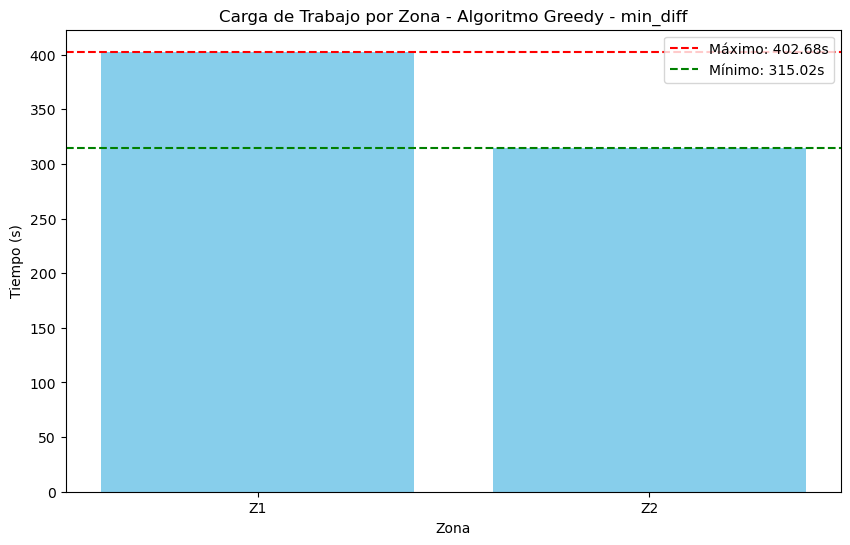

In [29]:
alg = 0 # 0: Greedy, 1: Layered, 2: GRASP

nombre_alg = ['Greedy', 'Layered', 'GRASP']

plt.figure(figsize=(10, 6))
plt.bar(w_s[alg][0].keys(), w_s[alg][0].values(), color='skyblue')
plt.axhline(w_s[alg][1], color='r', linestyle='--', label=f'Máximo: {w_s[alg][1]:.2f}s')
plt.axhline(w_s[alg][2], color='g', linestyle='--', label=f'Mínimo: {w_s[alg][2]:.2f}s')
plt.title(f'Carga de Trabajo por Zona - Algoritmo {nombre_alg[alg]} - {OBJECTIVE}')
plt.xlabel('Zona')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

# Results comparision

min_diff


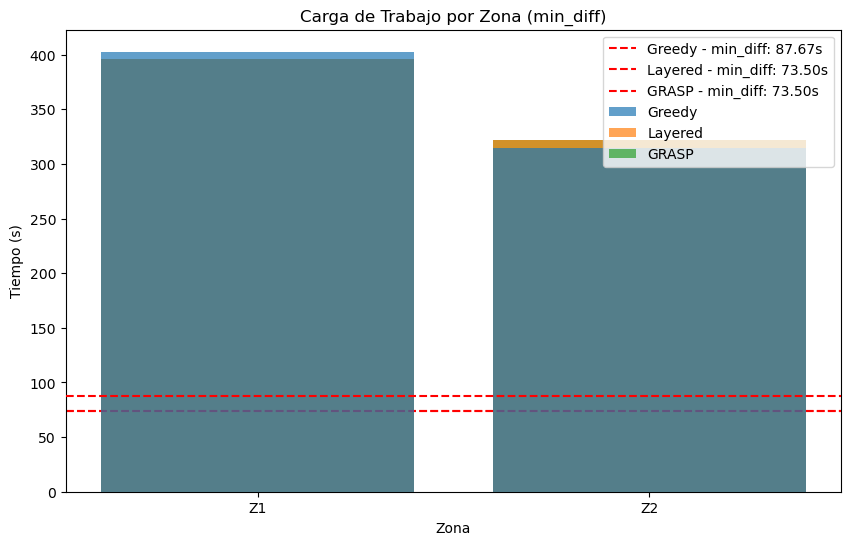

In [30]:
#Comparacion de resultados

print(OBJECTIVE)

def linea_objetivo(workloads, objective):
    if objective == 'min_avg':
        return sum(workloads.values())/len(workloads)
    elif objective == 'min_diff':
        return max(workloads.values()) - min(workloads.values())
    elif objective == 'min_max':
        return max(workloads.values())


def lista_linea_objetivos_por_alg(workloads_list, objective):
    lista = []
    for workloads in workloads_list:
        lista.append(linea_objetivo(workloads, objective))
    return lista      

def plot_workloads_comparison(workloads_list, labels, objective):
    lineas_objetivo = lista_linea_objetivos_por_alg(workloads_list, objective)
    plt.figure(figsize=(10, 6))
    for i, (workloads, label) in enumerate(zip(workloads_list, labels)):        
        plt.bar(workloads.keys(), workloads.values(), alpha=0.7, label=label, zorder=3-i)
        plt.axhline(lineas_objetivo[i], color='r', linestyle='--', label=f'{label} - {objective}: {lineas_objetivo[i]:.2f}s', zorder=3-i)
    plt.title(f'Carga de Trabajo por Zona ({objective})')
    plt.xlabel('Zona')
    plt.ylabel('Tiempo (s)')
    plt.legend()
    plt.show()

plot_workloads_comparison(
    [w_s[0][0], w_s[1][0], w_s[2][0]],
    ['Greedy', 'Layered', 'GRASP'],
    OBJECTIVE
)


In [31]:
#Ejecutar para 3 instancias, Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx, Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx, Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx

#Metodo para leer los datos 

def read_data(file_path):
    excel_model = pd.ExcelFile(file_path)

    # Lectura de conjuntos
    Conjunto_pedidos = pd.read_excel(excel_model, 'Pedidos', index_col=0)
    Conjunto_zonas = pd.read_excel(excel_model, 'Zonas', index_col=0)
    Conjunto_salidas = pd.read_excel(excel_model, 'Salidas', index_col=0)
    Conjunto_skus = pd.read_excel(excel_model, 'SKU', index_col=0)

    # Lectura de parámetros de salidas
    N_Salidas = pd.read_excel(excel_model, 'Salidas_en_cada_zona', index_col=0)
    Salidas_por_zona = pd.read_excel(excel_model, 'Salidas_pertenece_zona', index_col=0)
    Tiempo_salidas = pd.read_excel(excel_model, 'Tiempo_salida', index_col=0)

    # Lectura de parámetros de SKUs
    SKUS_por_pedido = pd.read_excel(excel_model, 'SKU_pertenece_pedido', index_col=0)
    Tiempo_SKU = pd.read_excel(excel_model, 'Tiempo_SKU', index_col=0)

    # Lectura de parámetros adicionales
    Parametros = pd.read_excel(excel_model, 'Parametros', index_col=0)

    pedidos = list(Conjunto_pedidos.index)
    zonas = list(Conjunto_zonas.index)
    salidas = list(Conjunto_salidas.index)
    skus = list(Conjunto_skus.index)

    V = Parametros['v']
    ZN = Parametros ['zn']

    v=float(V)
    zn=float(ZN)

    # Salidas que están incluidas en cada zona
    s = {(j, k): Salidas_por_zona.at[j, k] for k in salidas for j in zonas}   
    
    rp = {(i, m): SKUS_por_pedido.at[i, m] for m in skus for i in pedidos}

    # Time to Pick an SKU at an Output
    d = {(j, k): Tiempo_salidas.at[j, k] for k in salidas for j in zonas}

    # Time to Process an SKU
    tra = {(i, m): Tiempo_SKU.at[i, m] for m in skus for i in pedidos}

    # Number of Outputs per Zone
    n_sal = N_Salidas.Num_Salidas

    return pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal, rp

instancias = ['Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx', 'Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx', 'Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx']

def generate_order_info(pedidos, skus, tra=tra, rp=rp, s=s, d=d):
    order_info = {}
    for i in pedidos:
        # Tiempo base de procesamiento
        tiempo_procesamiento = sum(tra[(i, m)] for m in skus if rp[(i, m)] == 1)

        # Distancias mínimas por zona (solo zonas donde el pedido puede asignarse)
        distancias_zona = {}
        for j in zonas:
            # Posiciones disponibles en la zona j (s_jk=1)
            posiciones_zona = [k for k in salidas if s[(j, k)] == 1]
            if posiciones_zona:
                distancia_min = min(d[(j, k)] for k in posiciones_zona)
                distancias_zona[j] = distancia_min

        order_info[i] = {
            'tiempo': tiempo_procesamiento,
            'distancias': distancias_zona
        }

    return order_info


# Ejecutar algoritmos para cada instancia y guardar en un diccionario

results = {}

OBJECTIVE = 'min_diff' # Opciones: 'min_avg', 'min_diff', 'min_max'

for instance in instancias:
    pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    order_info = 0
    rp = 0
    print(f"\n--- Ejecutando Instancia: {instance} ---")
    pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal, rp = read_data(instance)
    order_info = generate_order_info(pedidos, skus, tra, rp, s, d)
    
    # Ejecutar algoritmos
    assignments_greedy, workloads_greedy, t1 = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
    assignments_layer, workloads_layer, t2 = layered_assignment_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
    assignments_grasp, workloads_grasp, t3 = randomized_grasp_construction(OBJECTIVE, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp)
    
    # Verificar factibilidad
    print("\n🔍 Verificación Integral de Factibilidad:")
    print(f"Greedy:")
    comprehensive_feasibility_check(assignments_greedy, workloads_greedy, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"Layered:")
    comprehensive_feasibility_check(assignments_layer, workloads_layer, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"GRASP:")
    comprehensive_feasibility_check(assignments_grasp, workloads_grasp, zonas, pedidos, d, v, order_info, n_sal, s)
    
    # Guardar resultados
    results[instance] = {
        'greedy': (assignments_greedy, workloads_greedy, t1),
        'layered': (assignments_layer, workloads_layer, t2),
        'grasp': (assignments_grasp, workloads_grasp, t3)
     }


--- Ejecutando Instancia: Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx ---


C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  v=float(V)
C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zn=float(ZN)



🔍 Verificación Integral de Factibilidad:
Greedy:
✅ Todas las restricciones se cumplen correctamente
Layered:
✅ Todas las restricciones se cumplen correctamente
GRASP:
✅ Todas las restricciones se cumplen correctamente

--- Ejecutando Instancia: Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx ---


C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  v=float(V)
C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zn=float(ZN)



🔍 Verificación Integral de Factibilidad:
Greedy:
✅ Todas las restricciones se cumplen correctamente
Layered:
✅ Todas las restricciones se cumplen correctamente
GRASP:
✅ Todas las restricciones se cumplen correctamente

--- Ejecutando Instancia: Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx ---


C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  v=float(V)
C:\Users\usuario\AppData\Local\Temp\ipykernel_21340\1277105301.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zn=float(ZN)



🔍 Verificación Integral de Factibilidad:
Greedy:
✅ Todas las restricciones se cumplen correctamente
Layered:
✅ Todas las restricciones se cumplen correctamente
GRASP:
✅ Todas las restricciones se cumplen correctamente


In [32]:
#Ahora la comparación con una tabla, dónde las filas son los algoritmos y las columnas las zonas, tiempo de computo, y el objetivo. Tambien hay una separacion por instancia

def generate_comparison_table(results):
    data = []
    for instance, algorithms in results.items():
        for algorithm, (assignments, workloads, time) in algorithms.items():
            name_instance = instance.split('/')[-1]
            row = {
                'Instancia': name_instance,
                'Algoritmo': algorithm,
                'Tiempo de Cómputo': time,
                'Objetivo': calculate_metric(workloads, OBJECTIVE),
                **workloads
            }
            data.append(row)
    return pd.DataFrame(data)

comparison_table = generate_comparison_table(results)
print("\nTabla de Comparación de Resultados, para el Objetivo:", OBJECTIVE)
comparison_table



Tabla de Comparación de Resultados, para el Objetivo: min_diff


,Instancia,Algoritmo,Tiempo de Cómputo,Objetivo,Z1,Z2,Z3,Z4
0,Data_40_Salidas_composición_zonas_heterogéneas...,greedy,0.000289,87.666207,402.682506,315.016299,NaN,NaN
1,Data_40_Salidas_composición_zonas_heterogéneas...,layered,0.000527,73.499540,395.599173,322.099632,NaN,NaN
2,Data_40_Salidas_composición_zonas_heterogéneas...,grasp,0.063306,73.499540,395.599173,322.099632,NaN,NaN
3,Data_60_Salidas_composición_zonas_homogéneas.xlsx,greedy,0.000374,21.500000,398.332874,388.499540,376.832874,NaN
4,Data_60_Salidas_composición_zonas_homogéneas.xlsx,layered,0.000474,0.250000,387.749540,387.916207,387.999540,NaN
5,Data_60_Salidas_composición_zonas_homogéneas.xlsx,grasp,0.083912,0.083333,387.916207,387.832874,387.916207,NaN
6,Data_80_Salidas_composición_zonas_heterogéneas...,greedy,0.000552,137.416207,441.849173,314.849632,434.932506,304.432966
7,Data_80_Salidas_composición_zonas_heterogéneas...,layered,0.000677,80.582874,414.265840,333.932966,414.182506,333.682966
8,Data_80_Salidas_composición_zonas_heterogéneas...,grasp,0.112820,79.082874,413.099173,334.099632,413.182506,335.682966


# Export results

In [33]:
def generar_reporte_excel(nombre_archivo, nombre_instancia, assignments, workloads):
    # Crear DataFrames
    # Hoja 1: Resumen
    w_max = max(workloads.values())
    nn = nombre_instancia.split('/')[-1]
    resumen_data = [[nn, zona, tiempo] 
                   for zona, tiempo in workloads.items() if tiempo == w_max]
    df_resumen = pd.DataFrame(resumen_data, columns=["Instancia", "Zona", "Maximo"])
    
    # Hoja 2: Solucion
    solucion_data = [[pedido, asignacion[1]]  # (j, k, Y_sel) -> k es la posición
                    for pedido, asignacion in assignments.items()]
    df_solucion = pd.DataFrame(solucion_data, columns=["Pedido", "Salida"])
    
    # Hoja 3: Metricas
    metricas_data = [[zona, tiempo] for zona, tiempo in workloads.items()]
    df_metricas = pd.DataFrame(metricas_data, columns=["Zona", "Tiempo"])
    
    # Configurar formato numérico
    formato_numerico = "{:,.1f}".format
    df_resumen["Maximo"] = df_resumen["Maximo"].apply(formato_numerico).str.replace(',', ';').str.replace('.', ',').str.replace(';', '.')
    df_metricas["Tiempo"] = df_metricas["Tiempo"].apply(formato_numerico).str.replace(',', ';').str.replace('.', ',').str.replace(';', '.')
    
    # Escribir a Excel
    with pd.ExcelWriter(nombre_archivo, engine='xlsxwriter') as writer:
        df_resumen.to_excel(writer, sheet_name='Resumen', index=False)
        df_solucion.to_excel(writer, sheet_name='Solucion', index=False)
        df_metricas.to_excel(writer, sheet_name='Metricas', index=False)
        
        # Ajustar ancho de columnas
        for hoja in writer.sheets:
            worksheet = writer.sheets[hoja]
            worksheet.set_column('A:C' if hoja == 'Resumen' else 'A:B', 20)


#Generar reporte para cada instancia
for instance, algorithms in results.items():
    
    for algorithm, (assignments, workloads, time) in algorithms.items():
        nombre_archivo = f"Reporte_{instance.split('/')[-1]}_{algorithm}.xlsx"
        print(nombre_archivo)
        generar_reporte_excel(nombre_archivo, instance, assignments, workloads)

Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_greedy.xlsx
Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_layered.xlsx
Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_grasp.xlsx
Reporte_Data_60_Salidas_composición_zonas_homogéneas.xlsx_greedy.xlsx
Reporte_Data_60_Salidas_composición_zonas_homogéneas.xlsx_layered.xlsx
Reporte_Data_60_Salidas_composición_zonas_homogéneas.xlsx_grasp.xlsx
Reporte_Data_80_Salidas_composición_zonas_heterogéneas.xlsx_greedy.xlsx
Reporte_Data_80_Salidas_composición_zonas_heterogéneas.xlsx_layered.xlsx
Reporte_Data_80_Salidas_composición_zonas_heterogéneas.xlsx_grasp.xlsx


# Algorithms flowcharts

In [34]:
from graphviz import Digraph

def generar_flujograma():
    # Crear objeto Digraph con formato PNG, alta resolución y fondo personalizado
    f = Digraph('GreedyFlow', format='png')
    f.graph_attr.update(dpi='500', bgcolor='mintcream')
    f.attr(rankdir='TB', size='14', splines='true')
    
    # Atributos globales para nodos
    f.attr('node', style='filled', fontname='Helvetica', fontsize='12')
    
    # Definición de nodos con estilos y colores personalizados
    f.node('Inicio', 'Inicio', shape='ellipse', fillcolor='lightgreen')
    f.node('Init', 'Inicializar:\n- Workloads\n- Posiciones\n- Asignaciones', shape='box', fillcolor='orange')
    f.node('Sort', 'Ordenar pedidos según objetivo:\n- min_max: Mayor tiempo primero\n- Otros: Orden original', shape='box', fillcolor='gold')
    f.node('ForLoop', 'Para cada pedido en orden', shape='box', fillcolor='lightblue')
    f.node('GenCand', 'Generar candidatos:\n- Zonas disponibles\n- Posición más cercana\n- Calcular Y_i', shape='box', fillcolor='plum')
    f.node('CheckCand', '¿Candidatos disponibles?', shape='diamond', fillcolor='lightpink')
    f.node('Select', 'Selección por objetivo:\n- min_avg: Menor Y_i\n- min_diff: Menor diferencia\n- min_max: Menor nuevo máximo', shape='box', fillcolor='lightcyan')
    f.node('Update', 'Actualizar:\n- Workloads\n- Posiciones\n- Asignaciones', shape='box', fillcolor='lightsalmon')
    # Nuevo nodo para la decisión: ¿Quedan pedidos?
    f.node('MasPedidos', '¿Quedan pedidos?', shape='diamond', fillcolor='lightgrey')
    f.node('Error', 'Error:\nNo hay posiciones', shape='ellipse', fillcolor='red', fontcolor='white')
    f.node('Fin', 'Fin', shape='ellipse', fillcolor='lightgreen')
    
    # Conexiones del flujograma
    f.edge('Inicio', 'Init', color='black')
    f.edge('Init', 'Sort', color='black')
    f.edge('Sort', 'ForLoop', color='black')
    f.edge('ForLoop', 'GenCand', color='black')
    f.edge('GenCand', 'CheckCand', color='black')
    f.edge('CheckCand', 'Select', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('CheckCand', 'Error', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('Select', 'Update', color='black')
    # Aquí se agrega el nodo de decisión para determinar si quedan pedidos
    f.edge('Update', 'MasPedidos', color='black')
    f.edge('MasPedidos', 'ForLoop', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('MasPedidos', 'Fin', label='No', color='red', fontname='Helvetica', fontsize='10')
    
    # Renderizar y guardar el diagrama en el directorio actual
    f.render('flujograma_greedy', cleanup=True)
    return 'flujograma_greedy.png'

# Generar imagen y mostrar la ruta
ruta_imagen = generar_flujograma()
print(f"Flujograma generado en: {ruta_imagen}")


Flujograma generado en: flujograma_greedy.png


In [35]:
from graphviz import Digraph
import numpy as np

def generar_flujograma_grasp():
    # Crear objeto Digraph con formato PNG, alta resolución y fondo personalizado
    f = Digraph('GRASPFlow', format='png', engine='dot')
    f.graph_attr.update(dpi='500', bgcolor='mintcream')
    f.attr(rankdir='TB', size='15,10', splines='true')
    
    # Atributos globales para nodos: estilo, fuente y tamaño
    f.attr('node', style='filled', fontname='Helvetica', fontsize='12')
    
    # Definir nodos principales con estilos y colores personalizados
    f.node('Inicio', 'Inicio GRASP', shape='ellipse', fillcolor='lightgreen')
    f.node('InitBest', 'Inicializar mejor solución:\nbest_assignments = None\nbest_metric = ∞', shape='box', fillcolor='orange')
    f.node('LoopStart', 'Iterar max_iter veces', shape='diamond', fillcolor='lightgrey')
    f.node('Reiniciar', 'Reinicializar estructuras:\n- Workloads\n- Available positions\n- Assignments', shape='box', fillcolor='lightblue')
    f.node('Ordenar', 'Ordenar pedidos:\n- Prioridad por tiempo\n- Componente aleatorio', shape='box', fillcolor='gold')
    f.node('ForEach', 'Para cada pedido', shape='box', fillcolor='lightblue')
    f.node('GenCand', 'Generar candidatos:\n- Zonas válidas\n- Calcular métrica', shape='box', fillcolor='plum')
    f.node('CheckCand', '¿Candidatos\ndisponibles?', shape='diamond', fillcolor='lightpink')
    f.node('BuildRCL', 'Construir RCL:\nthreshold = min + α*(max - min)', shape='box', fillcolor='lightcyan')
    f.node('SelectRCL', 'Selección aleatoria\ndesde RCL', shape='box', fillcolor='lightcyan')
    f.node('Update', 'Actualizar asignaciones\ny workloads', shape='box', fillcolor='lightsalmon')
    f.node('EvalSol', 'Evaluar solución:\nactual_metric = calcular_metric()', shape='box', fillcolor='lightgoldenrod')
    f.node('CheckBest', '¿actual_metric < best_metric?', shape='diamond', fillcolor='lightpink')
    f.node('UpdateBest', 'Actualizar mejor solución', shape='box', fillcolor='orange')
    f.node('Fin', 'Retornar mejor solución', shape='ellipse', fillcolor='lightgreen')
    f.node('Error', 'Error: Sin candidatos', shape='ellipse', fillcolor='red', fontcolor='white')

    # Conexiones principales con estilos (color de borde y etiquetas cuando corresponda)
    f.edge('Inicio', 'InitBest', color='black')
    f.edge('InitBest', 'LoopStart', color='black')
    f.edge('LoopStart', 'Reiniciar', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('Reiniciar', 'Ordenar', color='black')
    f.edge('Ordenar', 'ForEach', color='black')
    f.edge('ForEach', 'GenCand', color='black')
    f.edge('GenCand', 'CheckCand', color='black')
    f.edge('CheckCand', 'BuildRCL', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('BuildRCL', 'SelectRCL', color='black')
    f.edge('SelectRCL', 'Update', color='black')
    f.edge('Update', 'ForEach', color='black')
    f.edge('CheckCand', 'Error', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('ForEach', 'EvalSol', label='Todos asignados', color='black')
    f.edge('EvalSol', 'CheckBest', color='black')
    f.edge('CheckBest', 'UpdateBest', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('UpdateBest', 'LoopStart', color='black')
    f.edge('CheckBest', 'LoopStart', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('LoopStart', 'Fin', label='Iteraciones completadas', color='black')
    
    # Subgrafo para el cálculo de métricas con estilo dashed y color personalizado en los nodos
    with f.subgraph(name='cluster_metrics') as c:
        c.attr(label='Cálculo de métricas', style='dashed')
        c.node('CalcMin', 'Calcular min_metric', shape='box', fillcolor='lightblue')
        c.node('CalcMax', 'Calcular max_metric', shape='box', fillcolor='lightblue')
        c.node('CalcThreshold', 'Calcular threshold', shape='box', fillcolor='lightblue')
        c.edge('GenCand', 'CalcMin', color='black')
        c.edge('CalcMin', 'CalcMax', color='black')
        c.edge('CalcMax', 'CalcThreshold', color='black')
        c.edge('CalcThreshold', 'BuildRCL', color='black')
    
    # Subgrafo para la función objetivo con estilo dashed y colores para los nodos
    with f.subgraph(name='cluster_objetivo') as c:
        c.attr(label='Selección por objetivo', style='dashed')
        c.node('ObjAvg', 'min_avg: promedio', shape='box', fillcolor='lightblue')
        c.node('ObjDiff', 'min_diff: diferencia', shape='box', fillcolor='lightblue')
        c.node('ObjMax', 'min_max: máximo', shape='box', fillcolor='lightblue')
        c.edge('GenCand', 'ObjAvg', color='black')
        c.edge('GenCand', 'ObjDiff', color='black')
        c.edge('GenCand', 'ObjMax', color='black')
    
    # Renderizar y guardar el diagrama en el directorio actual
    f.render('flujograma_grasp', cleanup=True)
    return 'flujograma_grasp.png'

# Generar imagen y mostrar la ruta
ruta_imagen = generar_flujograma_grasp()
print(f"Flujograma GRASP generado en: {ruta_imagen}")


Flujograma GRASP generado en: flujograma_grasp.png
